In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/cs231n/Project/

/content/drive/My Drive/cs231n/Project


In [2]:
import numpy as np
import cv2
import pandas as pd
import os, sys

In [3]:
image_path = "/content/drive/My Drive/cs231n/Project/datasets/val/images/"
image_dir = os.listdir(image_path)
image_dir.sort()

In [4]:
label_path = "/content/drive/My Drive/cs231n/Project/datasets/val/labels/"
label_dir = os.listdir(label_path)
label_dir.sort()

In [5]:
def ssd_mobilenet(filename):
  image = cv2.imread(filename)
  #image = cv2.imread('/content/drive/My Drive/cs231n/Project/datasets/val/images/004000.jpg')
  #image = cv2.resize(image, (640, 480))
  h = image.shape[0]
  w = image.shape[1]

  # path to the weights and model files
  weights = "/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/frozen_inference_graph.pb"
  model = "/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
  # load the MobileNet SSD model trained  on the COCO dataset
  net = cv2.dnn.readNetFromTensorflow(weights, model)

  # load the class labels the model was trained on
  class_names = []
  with open("/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/coco_names.txt", "r") as f:
      class_names = f.read().strip().split("\n")

  # create a blob from the image
  blob = cv2.dnn.blobFromImage(
      image, 1.0/127.5, (320, 320), [127.5, 127.5, 127.5])
  # pass the blog through our network and get the output predictions
  net.setInput(blob)
  output = net.forward()  # shape: (1, 1, 100, 7)

  final_box = (0,0,0,0)
  # loop over the number of detected objects
  for detection in output[0, 0, :, :]:  # output[0, 0, :, :] has a shape of: (100, 7)
      # the confidence of the model regarding the detected object
      probability = detection[2]

      # if the confidence of the model is lower than 50%,
      # we do nothing (continue looping)
      if probability < 0.5:
          continue

      # perform element-wise multiplication to get
      # the (x, y) coordinates of the bounding box
      box = [int(a * b) for a, b in zip(detection[3:7], [w, h, w, h])]
      box = tuple(box)

      class_id = int(detection[1])
      if class_names[class_id - 1].lower() == "person":
        final_box = box

  return final_box


In [6]:
# Convert box (x_min, y_min, x_max, y_max) to (x_centre, y_centre, width, height)
def coordinate_convert(image, box):
  height, width, channels = image.shape
  x_min, y_min, x_max, y_max = box
  x_centre = (x_min + x_max)/2 / width
  y_centre = (y_min + y_max)/2 / height
  rel_width = (x_max - x_min) / width
  rel_height = (y_max - y_min) / height
  return (x_centre, y_centre, rel_width, rel_height)


In [9]:
xy_diff_list = []

for i in range(0, len(image_dir)):
  filename = image_path + image_dir[i]
  bbox = ssd_mobilenet(filename)
  image = cv2.imread(filename)
  x_centre, y_centre, rel_width, rel_height = coordinate_convert(image, bbox)

  labelname = label_path + label_dir[i]
  with open(labelname) as f:
    lines = f.readlines()
  
  if lines == []:
    label_x_centre = 0
    label_y_centre = 0
  else:
    label_x_centre = float(lines[0].split()[1])
    label_y_centre = float(lines[0].split()[2])

  diff_x = abs(x_centre - label_x_centre)
  diff_y = abs(y_centre - label_y_centre)

  xy_diff_list.append((diff_x, diff_y))


In [10]:
# Calculate accuracy: threshold = 0.1
thre = 0.1
total = 0; pos = 0
for x_diff, y_diff in xy_diff_list:
  total += 1
  if (x_diff <= thre and y_diff <= thre):
    pos += 1

accuracy = pos/total
print("The precision of the model is {}.".format(accuracy))

The precision of the model is 0.518.


In [11]:
# Calculate accuracy: threshold = 0.05
thre = 0.05
total = 0; pos = 0
for x_diff, y_diff in xy_diff_list:
  total += 1
  if (x_diff <= thre and y_diff <= thre):
    pos += 1

accuracy = pos/total
print("The precision of the model is {}.".format(accuracy))

The precision of the model is 0.446.


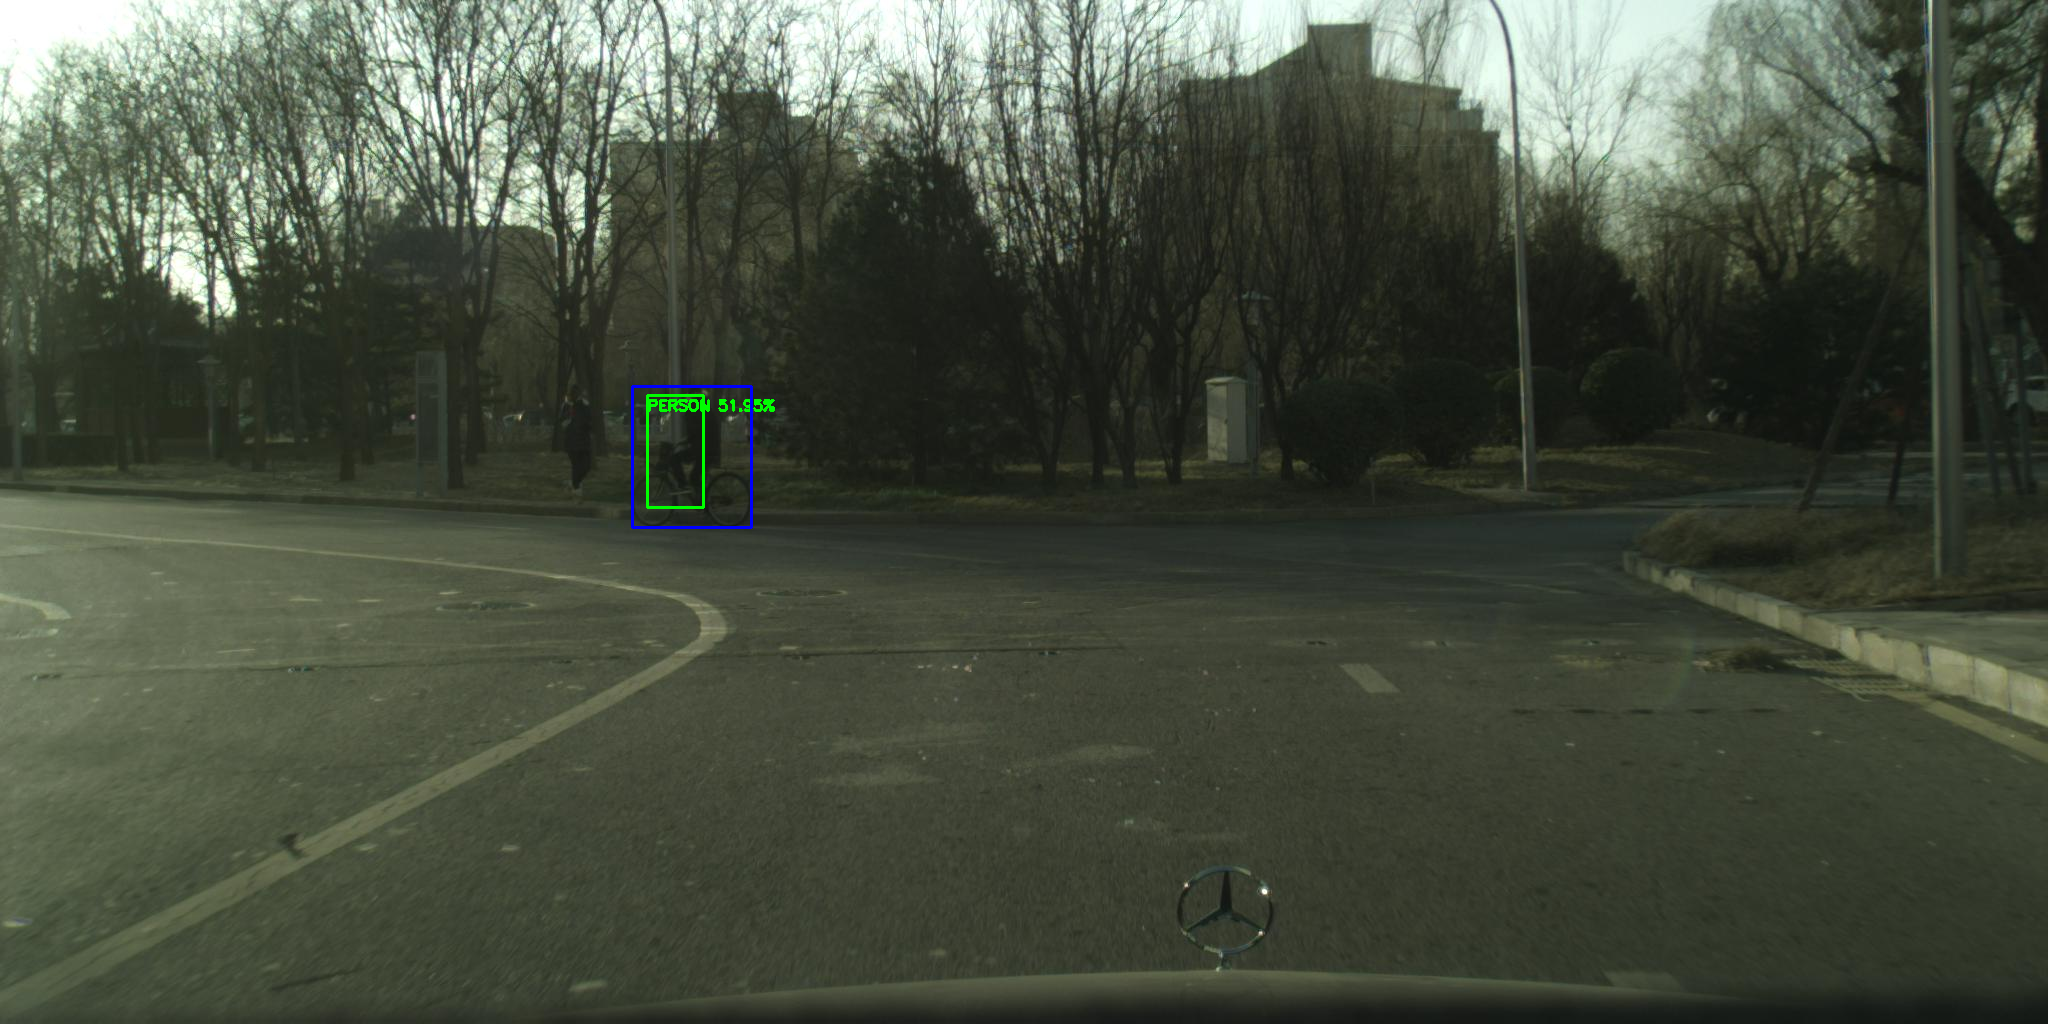

-1

In [23]:
#image = cv2.imread(filename)
image = cv2.imread('/content/drive/My Drive/cs231n/Project/datasets/val/images/004000.jpg')
#image = cv2.resize(image, (640, 480))
h = image.shape[0]
w = image.shape[1]

# path to the weights and model files
weights = "/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/frozen_inference_graph.pb"
model = "/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
# load the MobileNet SSD model trained  on the COCO dataset
net = cv2.dnn.readNetFromTensorflow(weights, model)

# load the class labels the model was trained on
class_names = []
with open("/content/drive/My Drive/cs231n/Project/Object_Detection/ssd_mobilenet/coco_names.txt", "r") as f:
    class_names = f.read().strip().split("\n")

# create a blob from the image
blob = cv2.dnn.blobFromImage(
    image, 1.0/127.5, (320, 320), [127.5, 127.5, 127.5])
# pass the blog through our network and get the output predictions
net.setInput(blob)
output = net.forward()  # shape: (1, 1, 100, 7)

box = (0,0,0,0)
# loop over the number of detected objects
for detection in output[0, 0, :, :]:  # output[0, 0, :, :] has a shape of: (100, 7)
    # the confidence of the model regarding the detected object
    probability = detection[2]

    # if the confidence of the model is lower than 50%,
    # we do nothing (continue looping)
    if probability < 0.5:
        continue

    # perform element-wise multiplication to get
    # the (x, y) coordinates of the bounding box
    box = [int(a * b) for a, b in zip(detection[3:7], [w, h, w, h])]
    box = tuple(box)
    #print(box)
    # draw the bounding box of the object
    cv2.rectangle(image, box[:2], box[2:], (0, 255, 0), thickness=2)

    # extract the ID of the detected object to get its name
    class_id = int(detection[1])
    # draw the name of the predicted object along with the probability
    label = f"{class_names[class_id - 1].upper()} {probability * 100:.2f}%"
    cv2.putText(image, label, (box[0], box[1] + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Draw YOLO
height, width, channels = image.shape

labelname = '/content/drive/My Drive/cs231n/Project/datasets/val/labels/004000.txt'
with open(labelname) as f:
  lines = f.readlines()

label_x_centre = float(lines[0].split()[1]) * width
label_y_centre = float(lines[0].split()[2]) * height
box_width = float(lines[0].split()[3]) * width
box_height = float(lines[0].split()[4]) * height

x1 = label_x_centre - box_width/2
x2 = label_x_centre + box_width/2
y1 = label_y_centre - box_height/2
y2 = label_y_centre + box_height/2
label_box = (int(x1), int(y1), int(x2), int(y2))
cv2.rectangle(image, label_box[:2], label_box[2:], (255, 0, 0), thickness=2)

from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey()
